<a href="https://colab.research.google.com/github/freida20git/SubjectiveQA-Rater/blob/main/notebooks/EDA_qa_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis:**

general goals:

1. Label distribution histograms

2. Heatmap of label correlations

3. Category and source distribution

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your dataset
file_path = '/content/drive/MyDrive/QArater/data/train.csv'  # <- update this
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (6079, 41)


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


Remove unneeded columns (user names, URLs, etc.)



In [ ]:
# Drop non-learning related columns
drop_cols = [
    'url',
    'answer_user_name', 'answer_user_page',
    'question_user_name', 'question_user_page'
]

df = df.drop(columns=drop_cols)


In [ ]:
df.head()

,qa_id,question_title,question_body,answer,category,host,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,"I just got extension tubes, so here's the skin...",LIFE_ARTS,photo.stackexchange.com,1.000000,0.333333,0.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,It might be helpful to look into the definitio...,CULTURE,rpg.stackexchange.com,1.000000,1.000000,0.000000,0.5,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Do you even need grooves? We make several pro...,SCIENCE,electronics.stackexchange.com,0.888889,0.666667,0.000000,1.0,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...","Sending an ""affidavit"" it is a dispute between...",CULTURE,judaism.stackexchange.com,0.888889,0.666667,0.666667,1.0,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,Check out Image Trace in Adobe Illustrator. \n...,LIFE_ARTS,graphicdesign.stackexchange.com,1.000000,0.666667,0.000000,1.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [ ]:
# Identify all label columns (metrics only)
label_cols = [col for col in df.columns if col.startswith('question_') or col.startswith('answer_')]
print(f"{len(label_cols)} metric columns identified.")

32 metric columns identified.


In [ ]:
label_cols

['question_title',
 'question_body',
 'question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

In [ ]:
label_cols.remove('question_body')
label_cols.remove('question_title')
label_cols

['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

Label distribution histograms

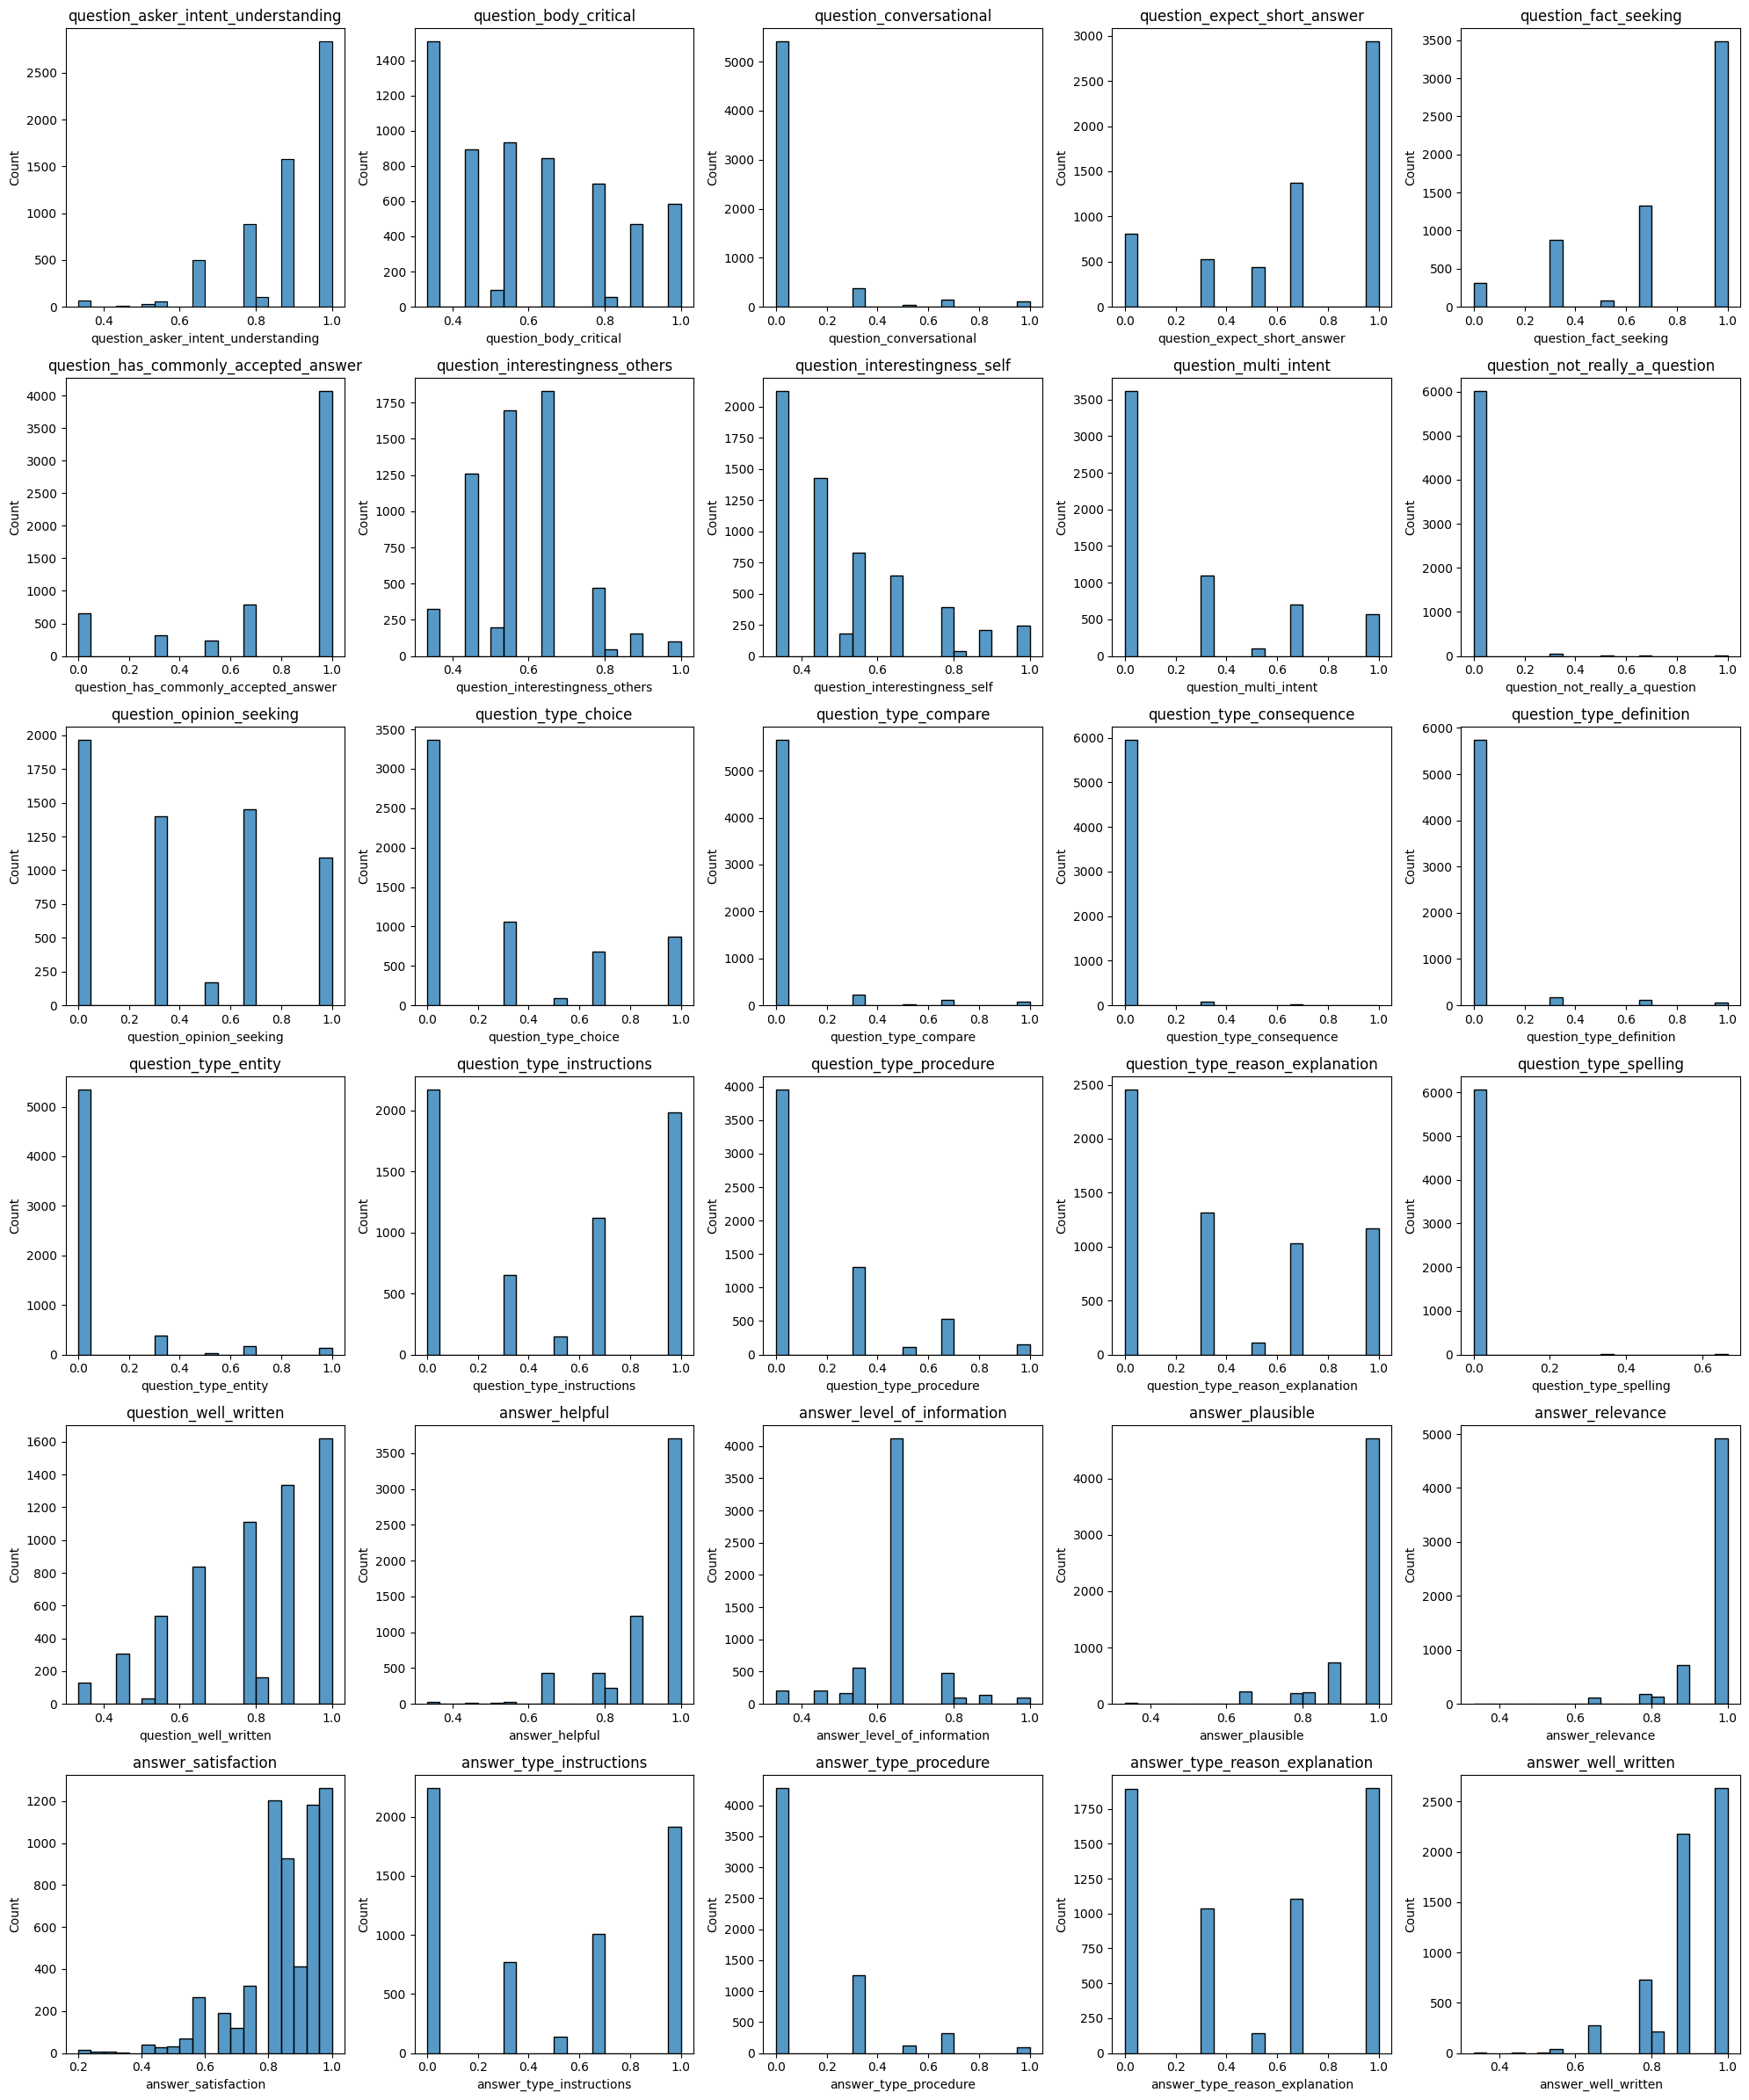

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all 30 metric columns
n_cols = 5
n_rows = (len(label_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 4 * n_rows))
for i, col in enumerate(label_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=False, bins=20)
    plt.title(col)
    plt.tight_layout()


Heatmap of label correlations

Text(0.5, 1.0, 'Correlation Heatmap Between Labels')

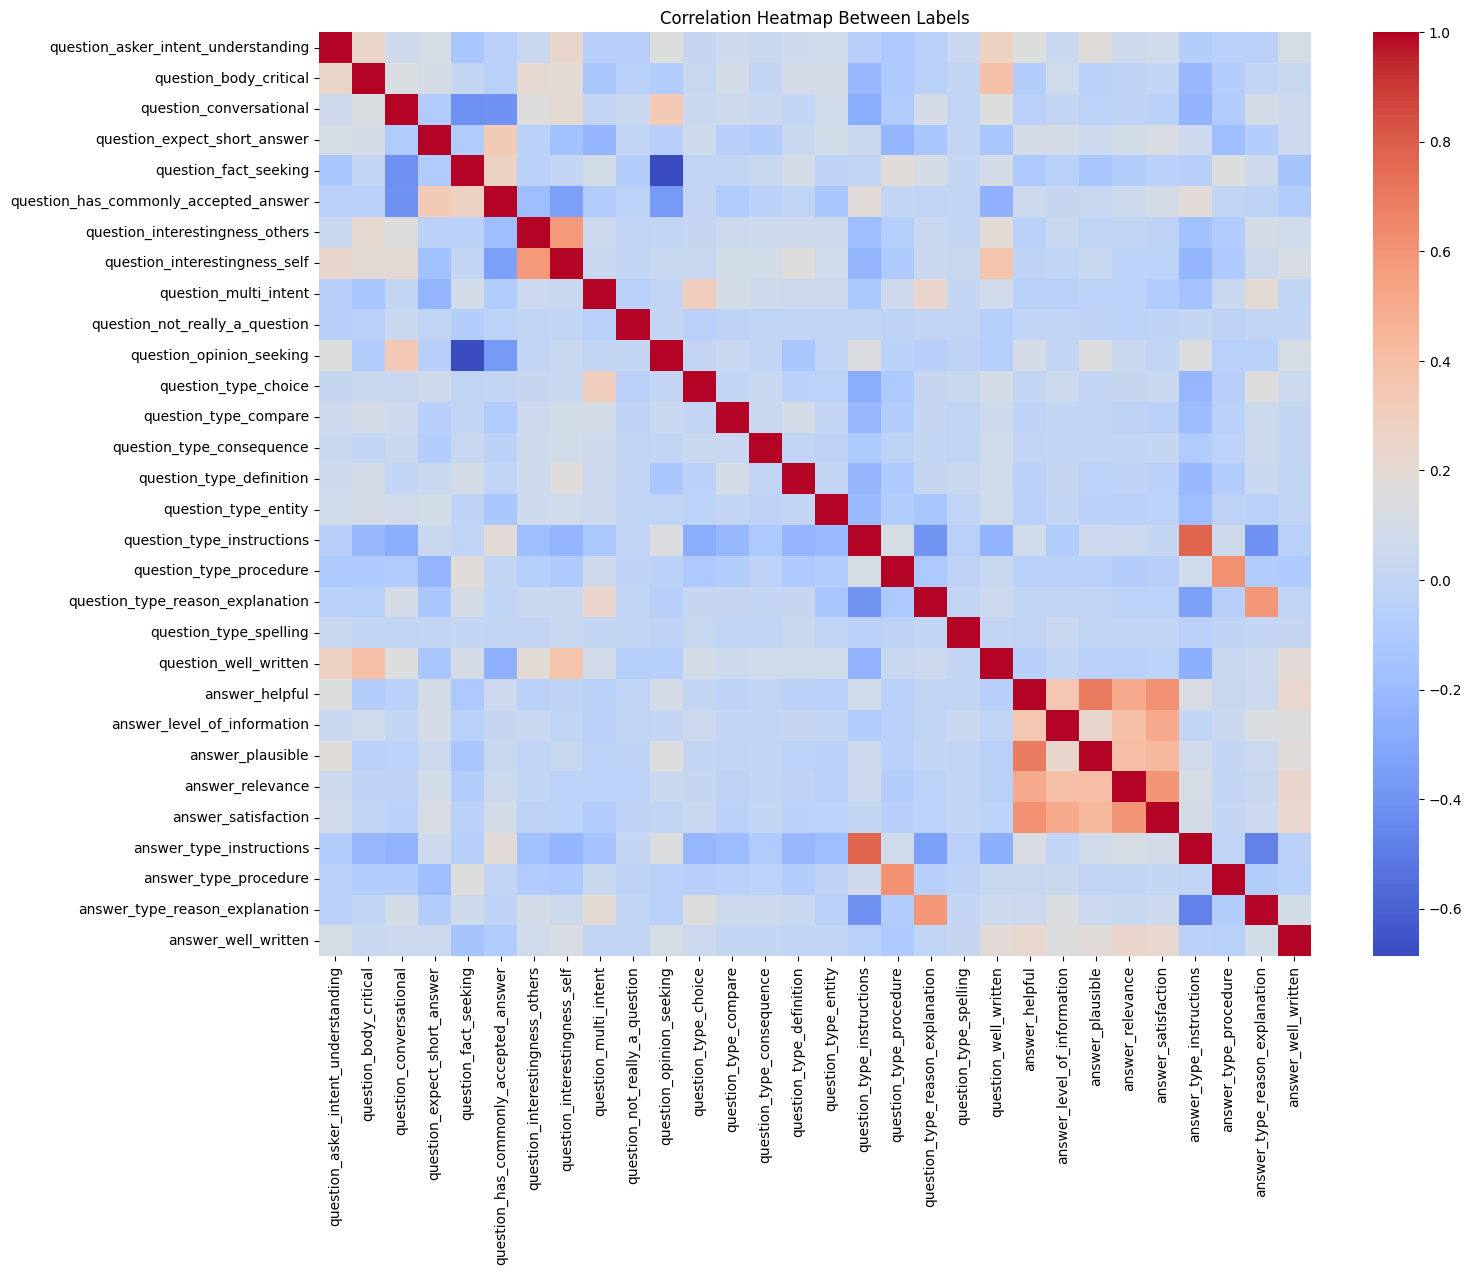

In [ ]:
plt.figure(figsize=(16, 12))
corr_matrix = df[label_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap Between Labels")

In [ ]:
# Mask self-correlations
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr_pairs = corr_matrix.where(mask)

threshold = 0.55

# Extract pairs above threshold
correlated_pairs = (
    high_corr_pairs.stack()
    .reset_index()
    .rename(columns={"level_0": "Label 1", "level_1": "Label 2", 0: "Correlation"})
    .query("Correlation >= @threshold")
    .sort_values(by="Correlation", ascending=False)
)

print(f"{len(correlated_pairs)} label pairs found with correlation ≥ {threshold}")
correlated_pairs

7 label pairs found with correlation ≥ 0.55


,Label 1,Label 2,Correlation
353,question_type_instructions,answer_type_instructions,0.769480
400,answer_helpful,answer_plausible,0.694601
366,question_type_procedure,answer_type_procedure,0.614208
402,answer_helpful,answer_satisfaction,0.613909
420,answer_relevance,answer_satisfaction,0.593552
378,question_type_reason_explanation,answer_type_reason_explanation,0.588116
159,question_interestingness_others,question_interestingness_self,0.572152


Category and source distribution

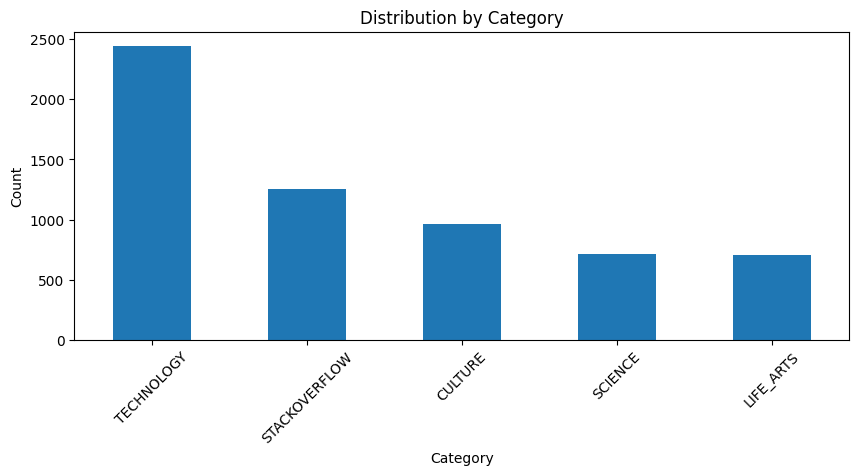

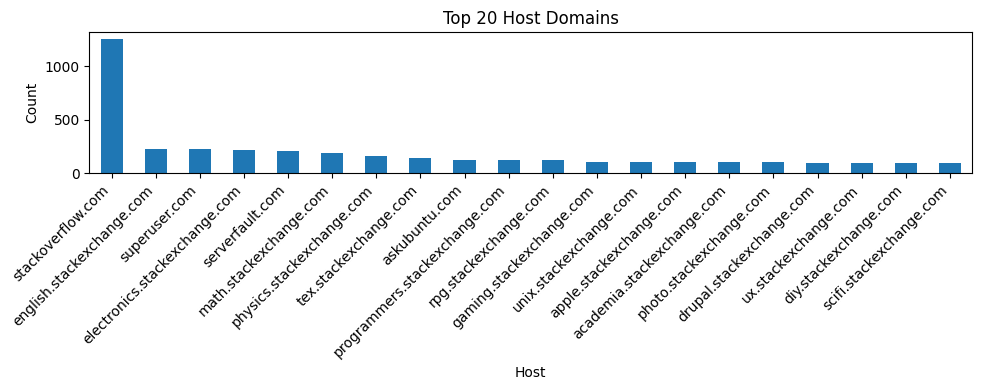

In [ ]:
# Category & Host Distribution

# Category frequency
plt.figure(figsize=(10, 4))
df['category'].value_counts().plot(kind='bar')
plt.title("Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Host frequency (top 20 sites)
plt.figure(figsize=(10, 4))
df['host'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Host Domains")
plt.xlabel("Host")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate and right-align
plt.tight_layout()  # Optional: ensures everything fits
